# Fake News Detection
(By Priyanka Gulati)



## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [11]:
#!pip install --upgrade numpy==1.26.4
#!pip install --upgrade pandas==2.2.2
#!pip install --upgrade nltk==3.9.1
#!pip install --upgrade spacy==3.7.5
#!pip install --upgrade scipy==1.12
#!pip install --upgrade pydantic==2.10.5
#!pip install wordcloud==1.9.4
#!python -m spacy download en_core_web_sm

## Importing the necessary libraries

In [14]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

#Importing Train val Split
from sklearn.model_selection import train_test_split

#Importing WordCloud
from wordcloud import WordCloud

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

#Import Gensim for Downloading Word2Vec
import gensim.downloader as api

#Import GridSearchCV for Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [15]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [17]:
# Import the first file - True.csv
true_df=pd.read_csv('True.csv')
# Import the second file - Fake.csv
fake_df=pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [20]:
# Inspect the DataFrame with True News to understand the given data
#Looking at the top 5 rows of true_df
true_df.head()

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [21]:
#Looking at the info of true_df
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [22]:
#Checking the shape
true_df.shape

(21417, 3)

In [23]:
#Checking Duplicate Rows
print(true_df.duplicated().sum()) 

217


In [24]:
#Removing the duplicate rows (as they don't add any additional information)
true_df= true_df.drop_duplicates()
true_df.shape

(21200, 3)

In [25]:
# Inspect the DataFrame with Fake News to understand the given data
#Looking at the top 5 rows of fake_df
fake_df.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [26]:
#Looking at the info of fake_df
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [27]:
#Checking the shape
fake_df.shape

(23523, 3)

In [28]:
#Checking Duplicate Rows
print(fake_df.duplicated().sum()) 

5601


In [29]:
#Removing the duplicate rows (as they don't add any additional information)
fake_df= fake_df.drop_duplicates()
fake_df.shape

(17922, 3)

In [30]:
# Print the column details for True News DataFrame
true_df.nunique()

title    20826
text     21192
date       716
dtype: int64

In [31]:
# Print the column details for Fake News DataFrame
fake_df.nunique()

title    17914
text     17466
date      1692
dtype: int64

In [32]:
# Print the column names of both DataFrames
#Column Names of true_df
true_df.columns.tolist()

['title', 'text', 'date']

In [33]:
#Column Names of fake_df
fake_df.columns.tolist()

['title', 'text', 'date']

### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [35]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [37]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

In [38]:
# Display the first 5 rows of the combined DataFrame to verify the result
combined_df.head()

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


In [39]:
#Checking the shape of Combined Data (17922+21200=39122 rows post removal of duplicates)
combined_df.shape

(39122, 4)

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [41]:
# Check Presence of Null Values
#Count of Null Values in Columns
combined_df.isnull().sum()

title          1
text           1
date          12
news_label     0
dtype: int64

In [42]:
#Percentage of Null Values in Columns
round((combined_df.isnull().sum()/len(combined_df))*100,3)

title         0.003
text          0.003
date          0.031
news_label    0.000
dtype: float64

As the number of null values are insignificant, we choose to drop the null value rows from the data.

In [44]:
# Handle Rows with Null Values
# Drop rows with any missing values
combined_df = combined_df.dropna()

# Verify no null values remain
print(combined_df.isnull().sum())


title         0
text          0
date          0
news_label    0
dtype: int64


In [45]:
#Checking shape after dropping null values
combined_df.shape

(39110, 4)

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [47]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
# Combine 'title' and 'text' into one column 'news_text'
combined_df['news_text'] = combined_df['title'] + ' ' + combined_df['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df = combined_df.drop(['title', 'text', 'date'], axis=1)
# Display the first 5 rows of the updated DataFrame to check the result
combined_df.head()

,news_label,news_text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [51]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean=pd.DataFrame()
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label']=combined_df['news_label'].copy()

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [53]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
    # Convert to lower case
    text=text.lower()
    # Remove text in square brackets
    text=re.sub(r'\[.*?\]','',text)
    # Remove punctuation
    text=re.sub(r'[^\w\s]','',text)
    # Remove words with numbers
    text=re.sub(r'\b\w*\d+\w*\b','',text)
    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [55]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['news_text']=combined_df['news_text'].apply(clean_text)

In [58]:
#Checking the clean dataset
df_clean.head()

,news_label,news_text
0,1,as us budget fight looms republicans flip thei...
1,1,us military to accept transgender recruits on ...
2,1,senior us republican senator let mr mueller do...
3,1,fbi russia probe helped by australian diplomat...
4,1,trump wants postal service to charge much more...


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [61]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def pos_lemmatization(text):    
    doc= nlp(text)
    tokens=[token.lemma_
            for token in doc
            if token.tag_ in ['NN','NNS']
            and not token.is_stop ]
    return ' '.join(tokens)
    

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [63]:
tqdm.pandas()
# Apply POS tagging and lemmatization function to cleaned text
processed_text=df_clean['news_text'].progress_apply(pos_lemmatization)
# Store it in a separate column in the new DataFrame
df_clean['processed_text']=processed_text

100%|██████████| 39110/39110 [29:36<00:00, 22.01it/s]


### Save the Cleaned data as a csv file (Recommended)

In [69]:
## Recommended to perform the below steps to save time while rerunning the code
# df_clean.to_csv("clean_df.csv", index=False)
# df_clean = pd.read_csv("clean_df.csv")

In [71]:
# Check the first few rows of the DataFrame
df_clean.head()

,news_label,news_text,processed_text
0,1,as us budget fight looms republicans flip thei...,budget fight script head faction month expansi...
1,1,us military to accept transgender recruits on ...,military transgender recruit people time milit...
2,1,senior us republican senator let mr mueller do...,mueller job counsel investigation link electio...
3,1,fbi russia probe helped by australian diplomat...,probe diplomat trump campaign adviser diplomat...
4,1,trump wants postal service to charge much more...,trump service service ship package amzno fight...


In [78]:
# Check the dimensions of the DataFrame
df_clean.shape

(39110, 3)

In [86]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39110 entries, 0 to 39121
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   news_label      39110 non-null  int64 
 1   news_text       39110 non-null  object
 2   processed_text  39110 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


There are no null values and the data type is object for text and int for label

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [97]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
#Added import statement at the beginning of the code, splitting the data using train test split 
train_df,val_df=train_test_split(df_clean, train_size=0.7, random_state=42)

In [98]:
#Checking the shapes of train and val data
print(train_df.shape)
print(val_df.shape)

(27377, 3)
(11733, 3)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [102]:
# Add a new column to calculate the character length of cleaned news text
train_df['cleaned_char_len'] = train_df['news_text'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['processed_char_len'] = train_df['processed_text'].apply(len)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

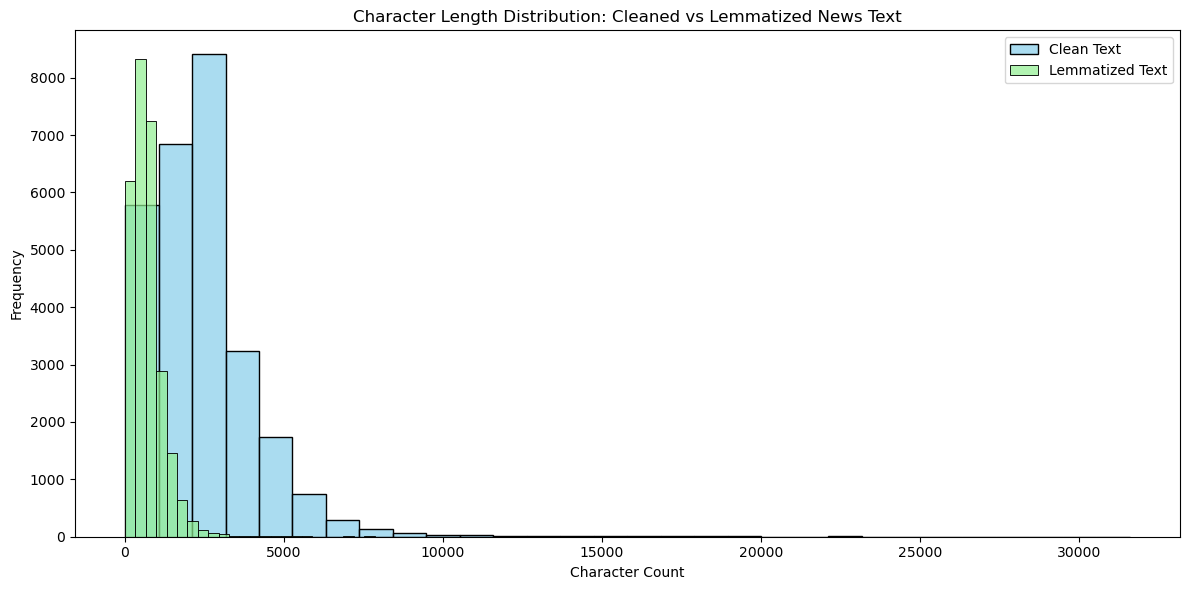

In [104]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(12, 6))
# Add histogram for cleaned news text
sns.histplot(train_df['cleaned_char_len'],bins=30,color='skyblue',alpha=0.7,label='Clean Text')
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(train_df['processed_char_len'],bins=30,color='lightgreen',alpha=0.7,label='Lemmatized Text')
plt.title('Character Length Distribution: Cleaned vs Lemmatized News Text')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

__Observations__

- The cleaned text (blue) has a wider distribution, stretching much farther on the right (some texts >20,000 characters).
- The lemmatized POS-tagged text (green) is tightly concentrated toward the left — meaning text is significantly shorter after filtering for nouns, removing stopwords and lemmatizing the text.
- The peak for lemmatized version is fairly below the peak for cleaned text.
- There's overlap, but the lemmatized version compresses the text a lot more, as expected.

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

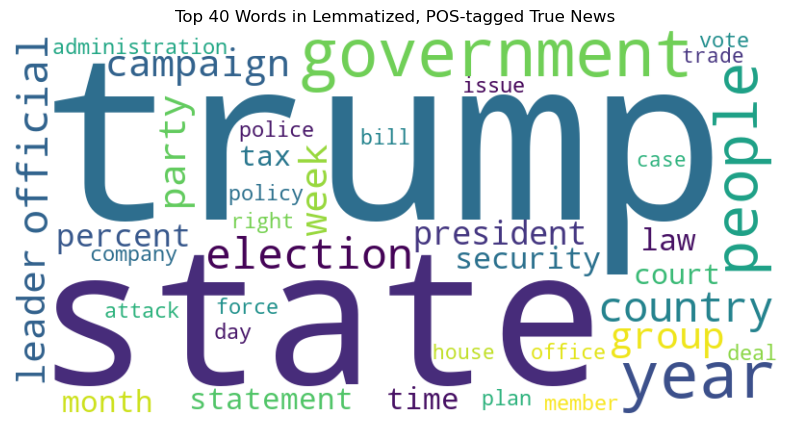

In [108]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
#We will be using the Lemmatized  news for identifying the top 40 frequent words ( to avoid any stopwords & 
#similar words and identify noun tagged words to identify concepts)

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_data = train_df[train_df['news_label'] == 1]
true_news_data['processed_text'] = true_news_data['processed_text'].apply(lambda x: str(x))
# Combine all processed text of true news into one large text
true_news_text = " ".join(true_news_data['processed_text'])
# Generate word cloud for True News
tokens = true_news_text.split()
word_freq = nltk.FreqDist(tokens)
top_40_words = dict(word_freq.most_common(40))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_40_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Top 40 Words in Lemmatized, POS-tagged True News')
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

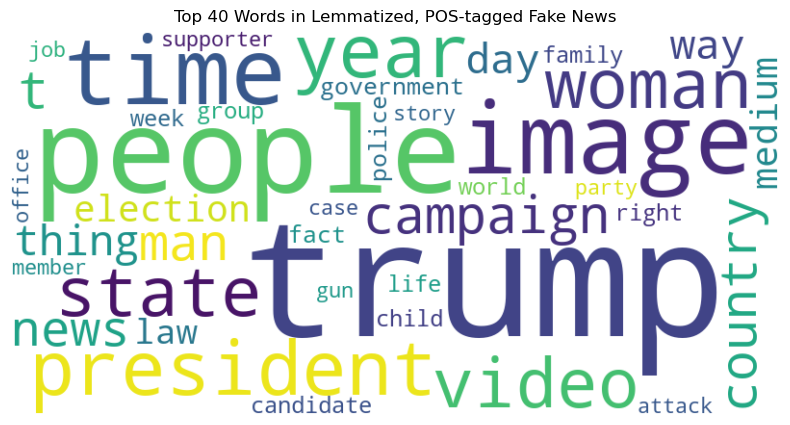

In [110]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_data = train_df[train_df['news_label'] == 0]
fake_news_data['processed_text'] = fake_news_data['processed_text'].apply(lambda x: str(x))
# Combine all processed text of true news into one large text
fake_news_text = " ".join(fake_news_data['processed_text'])
# Generate word cloud for Fake News
tokens = fake_news_text.split()
word_freq = nltk.FreqDist(tokens)
top_40_words = dict(word_freq.most_common(40))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_40_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Top 40 Words in Lemmatized, POS-tagged Fake News')
plt.show()


__Observations__

- Both True and Fake News mention Trump, State, Government, Election , Year and People. These are likely general political topics covered in both kinds of news.
- Fake News focuses more on emotionally charged words like attack, image, gun, woman, child. This could be an effort to sensationalise and create emotionally provocative headlines.
- True News contains more formal and institutional language with usage of words like official, administration,statement,policy,court.

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [114]:
# Write a function to get the specified top n-grams
def get_top_ngrams(text_data, ngram_range=(1, 1), top_n=10):
    # Initialize the CountVectorizer with the desired ngram range
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    
    # Fit the vectorizer to the text data and get n-gram counts
    ngram_matrix = vectorizer.fit_transform(text_data)
    
    # Get the frequency of each n-gram (sum of occurrences)
    ngram_freq = ngram_matrix.sum(axis=0).A1  # Convert the sparse matrix to a dense array
    ngram_names = vectorizer.get_feature_names_out()  # Get the names of the n-grams
    
    # Create a DataFrame to organize the n-grams and their frequencies
    ngram_df = pd.DataFrame({'N-gram': ngram_names, 'Frequency': ngram_freq})
    
    # Sort the n-grams by frequency and get the top 'top_n' n-grams
    ngram_df = ngram_df.sort_values(by='Frequency', ascending=False).head(top_n)
    
    return ngram_df


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [116]:
# Handle NaN values in the text data
#Checking NaN values in data
print(train_df['news_text'].isnull().sum())
print(train_df['processed_text'].isnull().sum())

0
0


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [119]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
#We will be using the Lemmatized  news for identifying the ngrams words ( to avoid any stopwords & 
#similar words and utilise noun tagged words to identify concepts)
top_10_unigrams = get_top_ngrams(true_news_data['processed_text'], ngram_range=(1, 1), top_n=10).reset_index(drop=True)
print(top_10_unigrams)

       N-gram  Frequency
0       trump      21972
1       state      14187
2  government      13667
3        year      13106
4      people      10567
5    election       9859
6     country       9509
7    official       9323
8    campaign       7728
9       party       7633


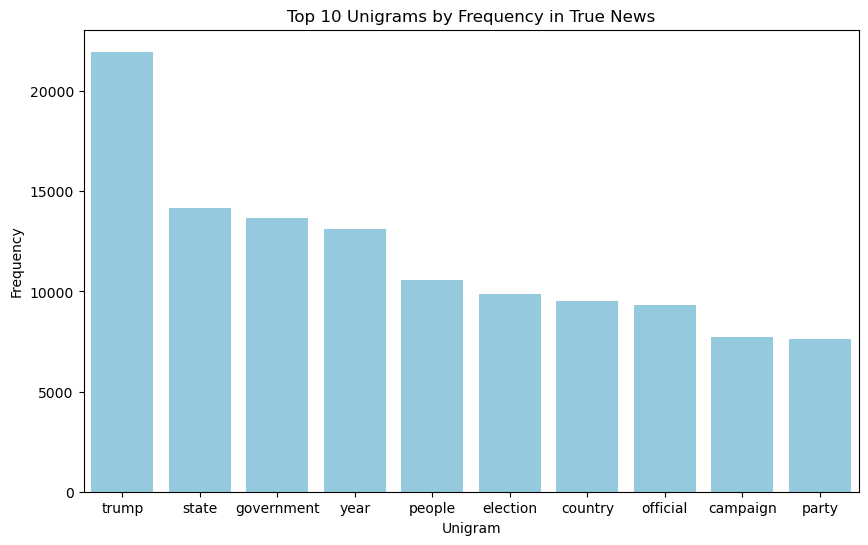

In [120]:
#Creating the Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_unigrams, color='skyblue')
plt.xlabel('Unigram')
plt.title('Top 10 Unigrams by Frequency in True News')
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [122]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_10_bigrams = get_top_ngrams(true_news_data['processed_text'], ngram_range=(2, 2), top_n=10).reset_index(drop=True)
print(top_10_bigrams)

                 N-gram  Frequency
0       news conference        964
1        trump campaign        891
2  trump administration        781
3        climate change        766
4       percent percent        737
5       request comment        735
6        security force        675
7   intelligence agency        652
8            tax reform        652
9  house representative        607


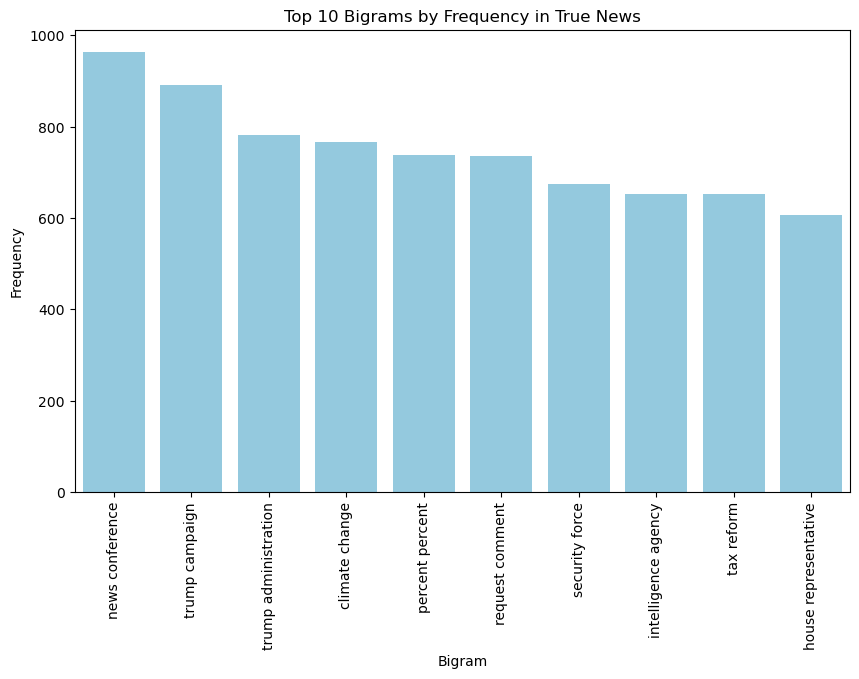

In [123]:
#Creating the Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_bigrams, color='skyblue')
plt.xlabel('Bigram')
plt.xticks(rotation=90)
plt.title('Top 10 Bigrams by Frequency in True News')
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [125]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_10_trigrams = get_top_ngrams(true_news_data['processed_text'], ngram_range=(3, 3), top_n=10).reset_index(drop=True)
print(top_10_trigrams)

                            N-gram  Frequency
0     official condition anonymity        247
1                 tax rate percent        180
2        state department official        129
3        article staff involvement        126
4  involvement creation production        126
5       staff involvement creation        126
6             rate percent percent        114
7             circuit court appeal        110
8                 use email server        106
9            trump transition team         91


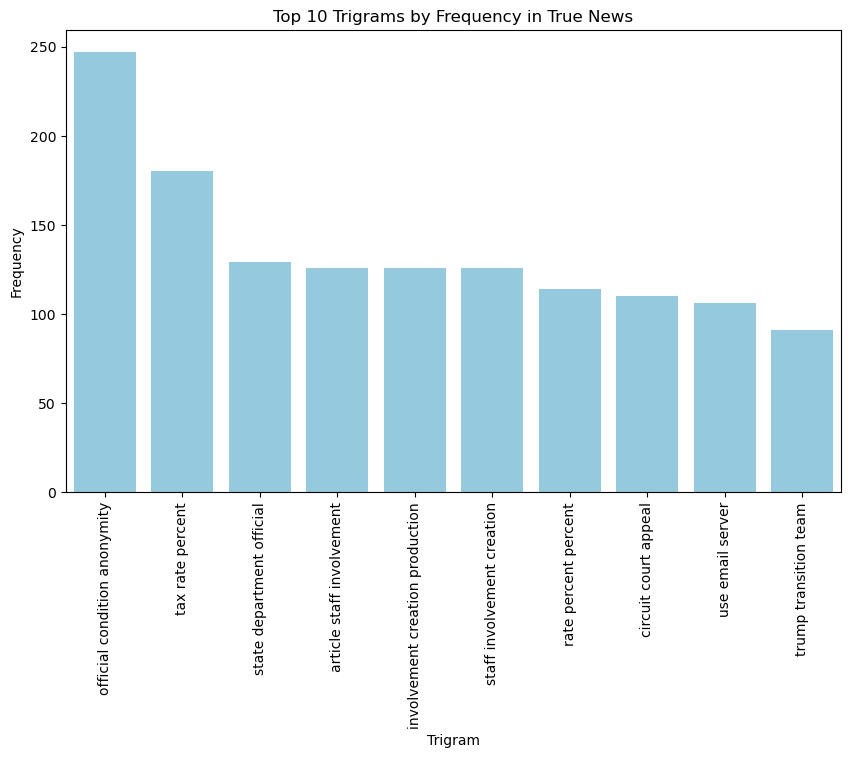

In [126]:
#Creating the Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_trigrams, color='skyblue')
plt.xlabel('Trigram')
plt.xticks(rotation=90)
plt.title('Top 10 Trigrams by Frequency in True News')
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [129]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_10_unigrams = get_top_ngrams(fake_news_data['processed_text'], ngram_range=(1, 1), top_n=10).reset_index(drop=True)
print(top_10_unigrams)

      N-gram  Frequency
0      trump      31035
1     people      14562
2      image       9438
3       time       8510
4  president       7886
5       year       7717
6      state       6493
7      woman       6479
8      video       6475
9   campaign       6037


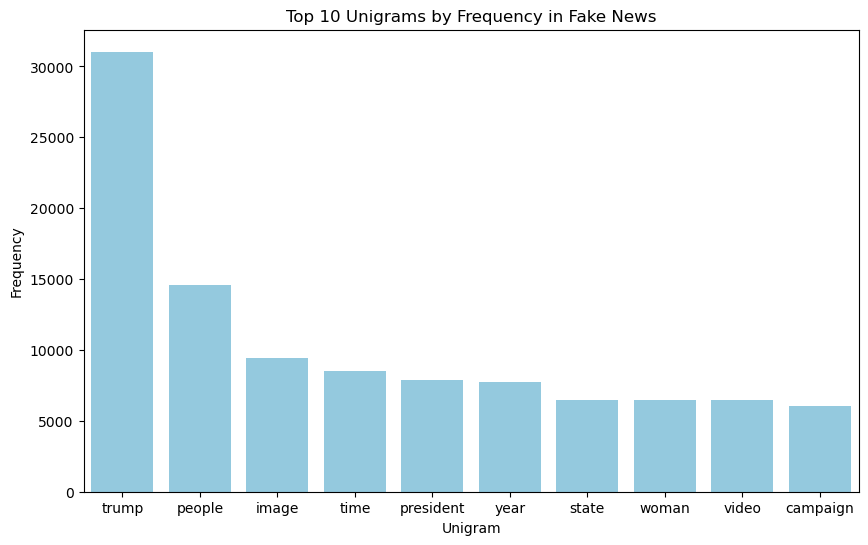

In [130]:
#Creating the Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_unigrams, color='skyblue')
plt.xlabel('Unigram')
plt.title('Top 10 Unigrams by Frequency in Fake News')
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [132]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_10_bigrams = get_top_ngrams(fake_news_data['processed_text'], ngram_range=(2, 2), top_n=10).reset_index(drop=True)
print(top_10_bigrams)

                  N-gram  Frequency
0            image image       1293
1        trump supporter       1191
2         trump campaign       1028
3         screen capture        955
4         police officer        856
5  trump realdonaldtrump        847
6           donald trump        844
7        law enforcement        747
8           century wire        686
9            getty image        665


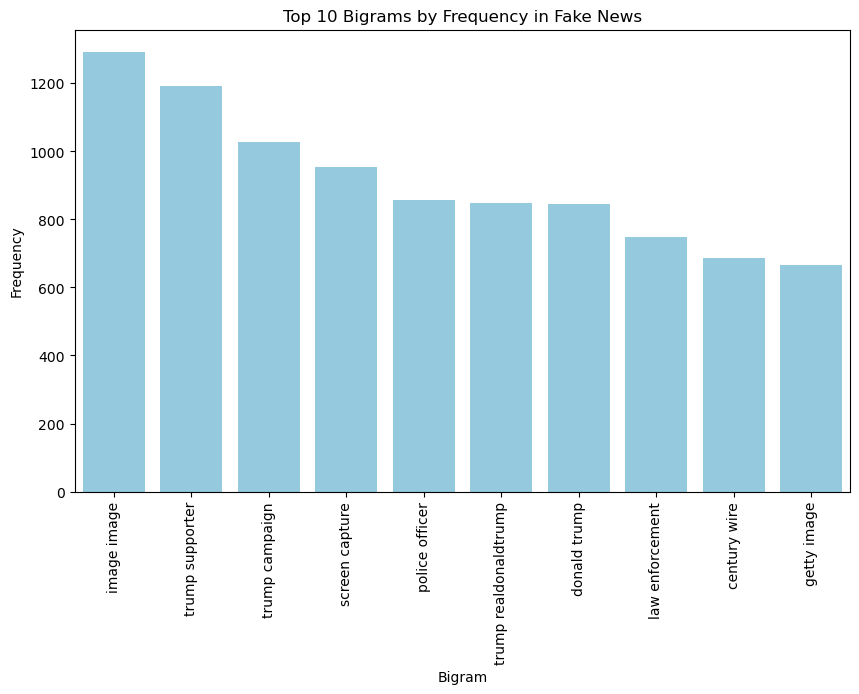

In [133]:
#Creating the Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_bigrams, color='skyblue')
plt.xlabel('Bigram')
plt.xticks(rotation=90)
plt.title('Top 10 Bigrams by Frequency in Fake News')
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [135]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_10_trigrams = get_top_ngrams(fake_news_data['processed_text'], ngram_range=(3, 3), top_n=10).reset_index(drop=True)
print(top_10_trigrams)

                        N-gram  Frequency
0         video screen capture        520
1           image video screen        489
2            image getty image        418
3            news century wire        339
4         image screen capture        320
5             image chip image        176
6       image video screenshot        157
7      law enforcement officer        121
8  trump realdonaldtrump trump         91
9            century wire file         86


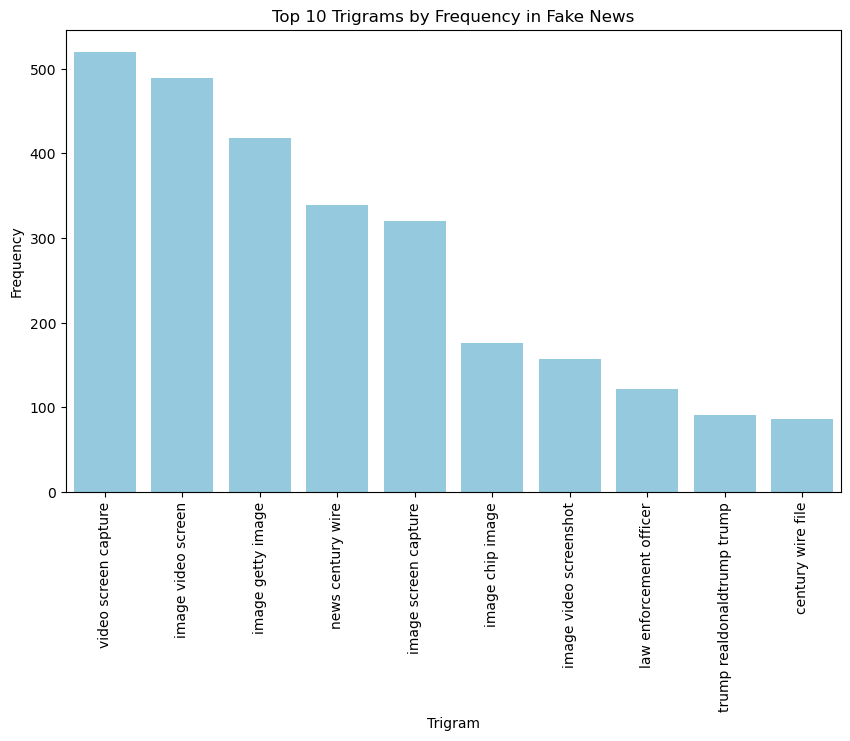

In [136]:
#Creating the Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_trigrams, color='skyblue')
plt.xlabel('Trigram')
plt.xticks(rotation=90)
plt.title('Top 10 Trigrams by Frequency in Fake News')
plt.show()

__Observations__

- Unigrams- True News uses formal terms like government, election etc. Fake News leans towards visual and sensational words like Image, Video etc.There are some common themes like Trump,State indicating the nature of political data.
- Bigrams-True News bigrams are policy/government related(like trump administration,climate change). Fake News features are repeatitive or viral terms (like image image, trump supporter)
- Trigrams- True News has structured phrases(like state department official). Fake news trigrams are primarily media related (like video screen capture, image getty image), hinting visual or fabricated content.

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [144]:
# Add a new column to calculate the character length of cleaned news text
val_df['cleaned_char_len'] = val_df['news_text'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
val_df['processed_char_len'] = val_df['processed_text'].apply(len)

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

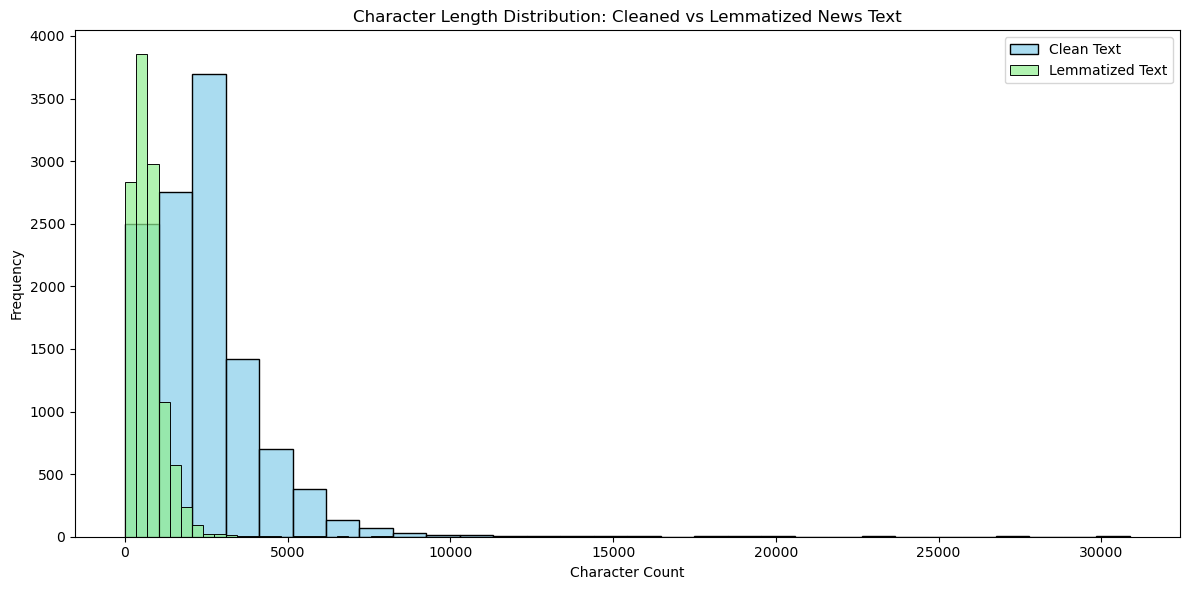

In [146]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(12, 6))
# Add histogram for cleaned news text
sns.histplot(val_df['cleaned_char_len'],bins=30,color='skyblue',alpha=0.7,label='Clean Text')
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(val_df['processed_char_len'],bins=30,color='lightgreen',alpha=0.7,label='Lemmatized Text')
plt.title('Character Length Distribution: Cleaned vs Lemmatized News Text')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

__Observations__

Validation Data shows similar pattern in character length distributions (like Train Data) , where clean text has a much wider distribution than the lemmatized text.Peak for lemmatized text is fairly below the cleaned text.

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

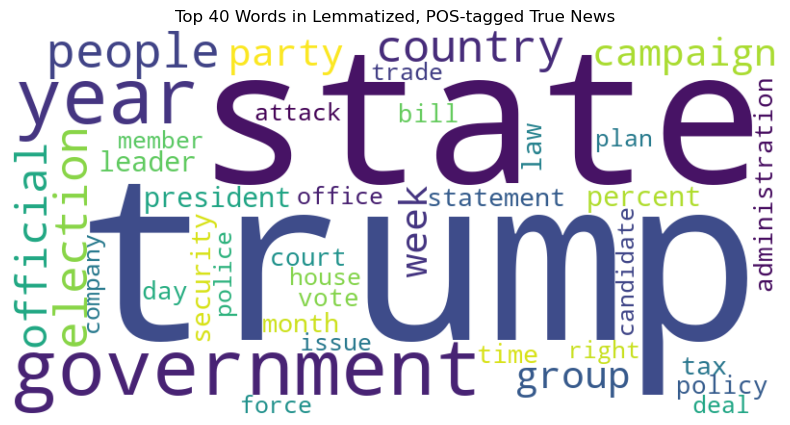

In [150]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_data = val_df[val_df['news_label'] == 1]
true_news_data['processed_text'] = true_news_data['processed_text'].apply(lambda x: str(x))
# Combine all processed text of true news into one large text
true_news_text = " ".join(true_news_data['processed_text'])
# Generate word cloud for True News
tokens = true_news_text.split()
word_freq = nltk.FreqDist(tokens)
top_40_words = dict(word_freq.most_common(40))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_40_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Top 40 Words in Lemmatized, POS-tagged True News')
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

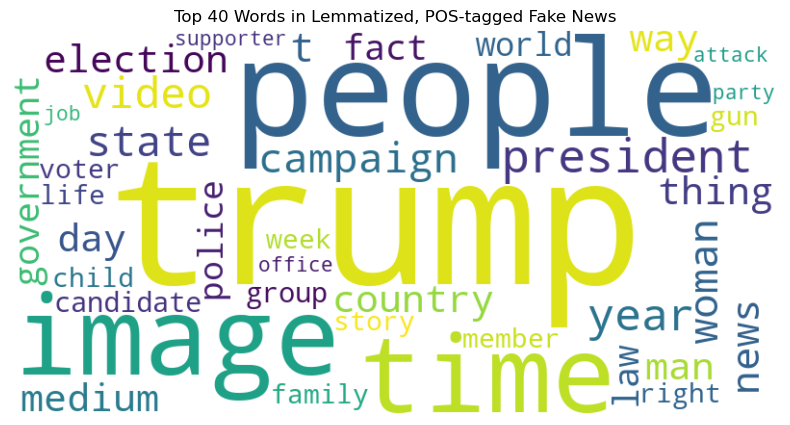

In [152]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_data = val_df[val_df['news_label'] == 0]
fake_news_data['processed_text'] = fake_news_data['processed_text'].apply(lambda x: str(x))
# Combine all processed text of true news into one large text
fake_news_text = " ".join(fake_news_data['processed_text'])
# Generate word cloud for Fake News
tokens = fake_news_text.split()
word_freq = nltk.FreqDist(tokens)
top_40_words = dict(word_freq.most_common(40))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_40_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Top 40 Words in Lemmatized, POS-tagged Fake News')
plt.show()


__Observations__
- Even in Validation Data, Fake News focuses more on emotionally charged words like attack, image,video, gun, woman, child. This could be an effort to sensationalise and create emotionally provocative headlines.
- Even in Validation Data, True News contains more formal and institutional language with usage of words like administration,law, statement,policy,court.

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [156]:
## Write a function to get the specified top n-grams
def get_top_ngrams(text_data, ngram_range=(1, 1), top_n=10):
    # Initialize the CountVectorizer with the desired ngram range
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    
    # Fit the vectorizer to the text data and get n-gram counts
    ngram_matrix = vectorizer.fit_transform(text_data)
    
    # Get the frequency of each n-gram (sum of occurrences)
    ngram_freq = ngram_matrix.sum(axis=0).A1  # Convert the sparse matrix to a dense array
    ngram_names = vectorizer.get_feature_names_out()  # Get the names of the n-grams
    
    # Create a DataFrame to organize the n-grams and their frequencies
    ngram_df = pd.DataFrame({'N-gram': ngram_names, 'Frequency': ngram_freq})
    
    # Sort the n-grams by frequency and get the top 'top_n' n-grams
    ngram_df = ngram_df.sort_values(by='Frequency', ascending=False).head(top_n)
    
    return ngram_df


##### 5.3.2 Handle the NaN values

In [158]:
## First handle NaN values in the text data
#Checking NaN values in data
print(val_df['news_text'].isnull().sum())
print(val_df['processed_text'].isnull().sum())

0
0


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [161]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_10_unigrams = get_top_ngrams(true_news_data['processed_text'], ngram_range=(1, 1), top_n=10).reset_index(drop=True)
print(top_10_unigrams)

       N-gram  Frequency
0       trump       9287
1       state       6039
2  government       5720
3        year       5638
4      people       4578
5    election       4288
6     country       4043
7    official       3778
8    campaign       3203
9       group       3183


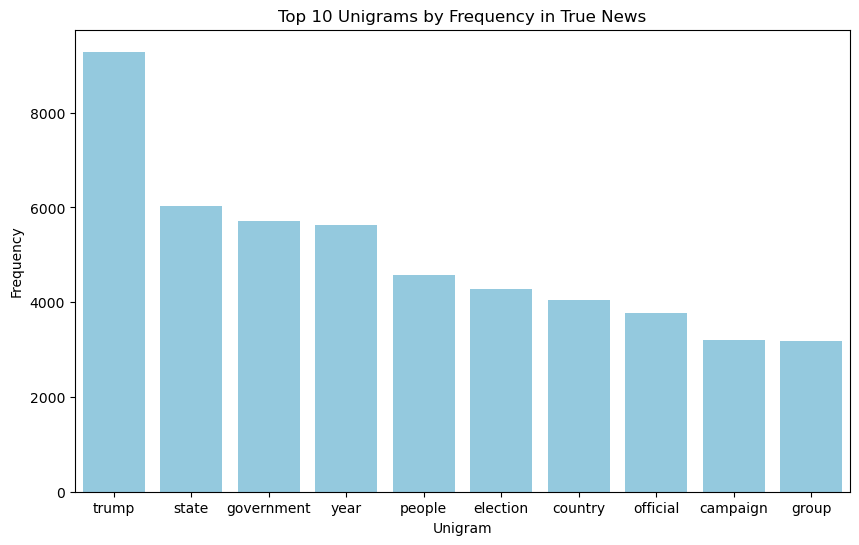

In [162]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
#Creating the Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_unigrams, color='skyblue')
plt.xlabel('Unigram')
plt.title('Top 10 Unigrams by Frequency in True News')
plt.show()

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [164]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_10_bigrams = get_top_ngrams(true_news_data['processed_text'], ngram_range=(2, 2), top_n=10).reset_index(drop=True)
print(top_10_bigrams)

                 N-gram  Frequency
0        trump campaign        400
1       news conference        399
2       percent percent        367
3            tax reform        362
4  trump administration        324
5        security force        306
6       request comment        295
7  house representative        278
8   intelligence agency        260
9           right group        253


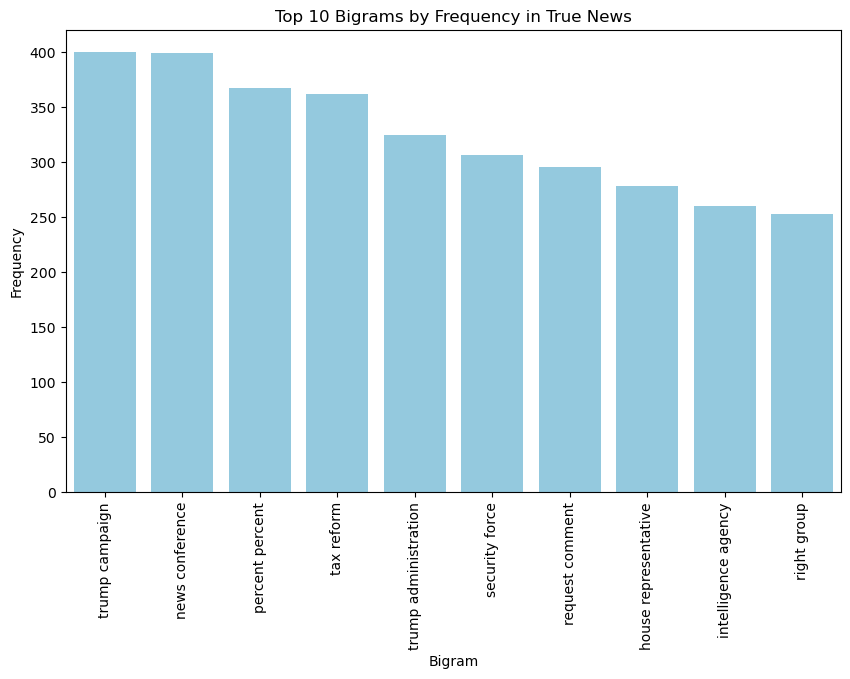

In [165]:
#Creating the Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_bigrams, color='skyblue')
plt.xlabel('Bigram')
plt.xticks(rotation=90)
plt.title('Top 10 Bigrams by Frequency in True News')
plt.show()

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [167]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_10_trigrams = get_top_ngrams(true_news_data['processed_text'], ngram_range=(3, 3), top_n=10).reset_index(drop=True)
print(top_10_trigrams)

                            N-gram  Frequency
0     official condition anonymity         85
1                 tax rate percent         60
2          percent percent percent         57
3        article staff involvement         53
4       staff involvement creation         53
5  involvement creation production         53
6                 use email server         52
7        state department official         50
8             circuit court appeal         47
9             rate percent percent         46


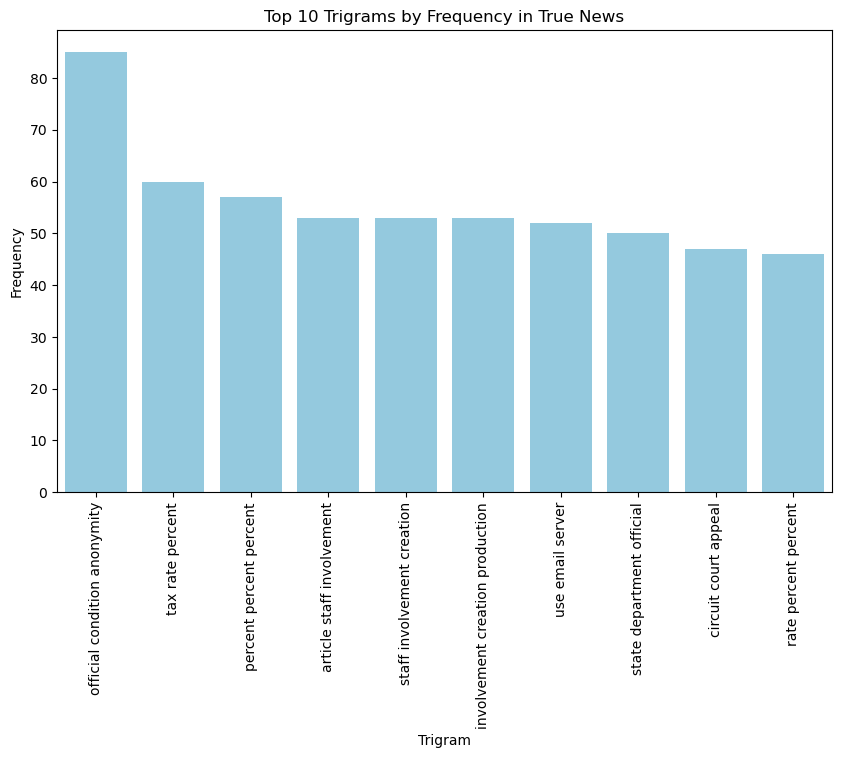

In [168]:
#Creating the Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_trigrams, color='skyblue')
plt.xlabel('Trigram')
plt.xticks(rotation=90)
plt.title('Top 10 Trigrams by Frequency in True News')
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [171]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_10_unigrams = get_top_ngrams(fake_news_data['processed_text'], ngram_range=(1, 1), top_n=10).reset_index(drop=True)
print(top_10_unigrams)

      N-gram  Frequency
0      trump      12750
1     people       6425
2      image       4017
3       time       3791
4  president       3493
5       year       3234
6      video       2916
7      state       2846
8   campaign       2746
9      woman       2740


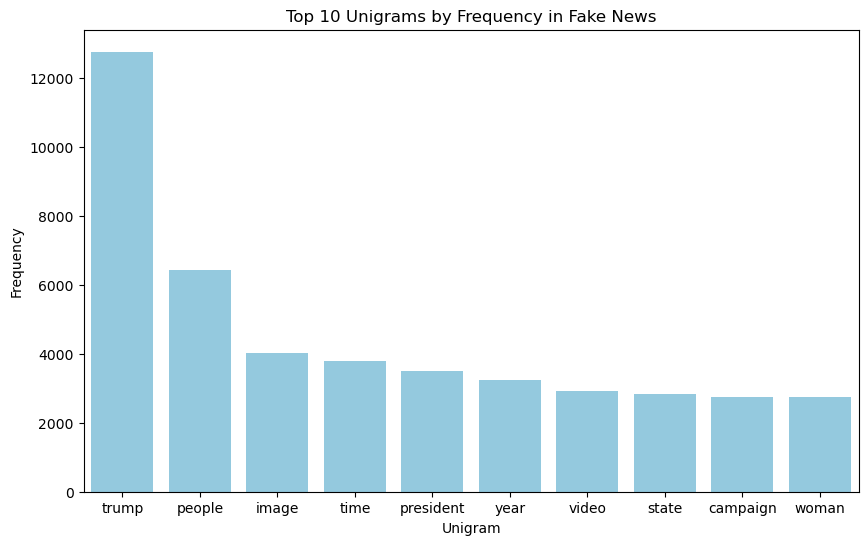

In [172]:
#Creating the Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_unigrams, color='skyblue')
plt.xlabel('Unigram')
plt.title('Top 10 Unigrams by Frequency in Fake News')
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [174]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_10_bigrams = get_top_ngrams(fake_news_data['processed_text'], ngram_range=(2, 2), top_n=10).reset_index(drop=True)
print(top_10_bigrams)

                  N-gram  Frequency
0            image image        545
1        trump supporter        480
2         trump campaign        422
3         screen capture        372
4  trump realdonaldtrump        350
5           donald trump        336
6         police officer        314
7        law enforcement        280
8            image video        279
9            getty image        278


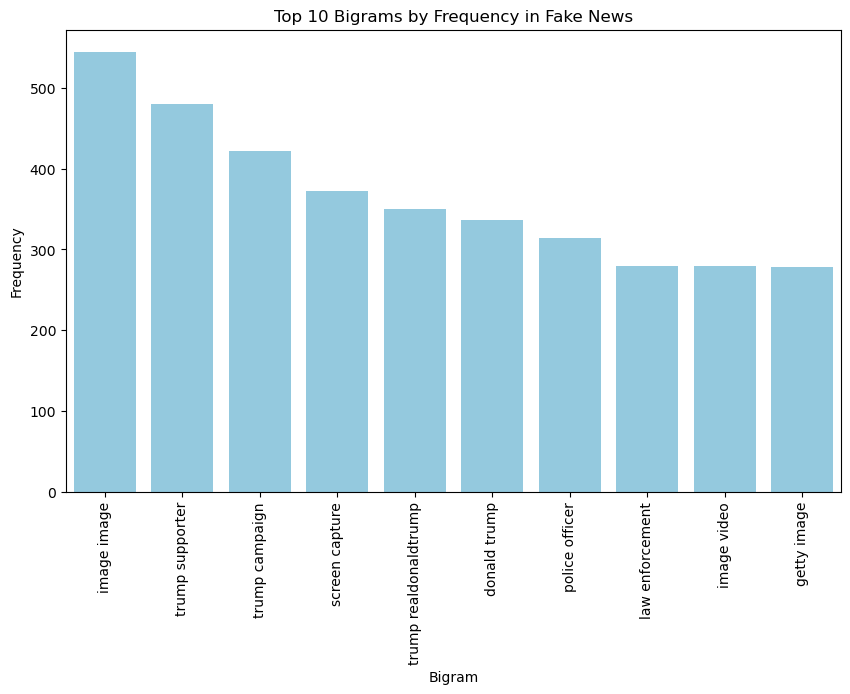

In [175]:
#Creating the Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_bigrams, color='skyblue')
plt.xlabel('Bigram')
plt.xticks(rotation=90)
plt.title('Top 10 Bigrams by Frequency in Fake News')
plt.show()

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [177]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_10_trigrams = get_top_ngrams(fake_news_data['processed_text'], ngram_range=(3, 3), top_n=10).reset_index(drop=True)
print(top_10_trigrams)


                        N-gram  Frequency
0         video screen capture        208
1           image video screen        199
2            image getty image        162
3         image screen capture        132
4            news century wire        115
5             image chip image         81
6       image video screenshot         74
7     spencer plattgetty image         44
8  trump realdonaldtrump trump         36
9            century wire file         36


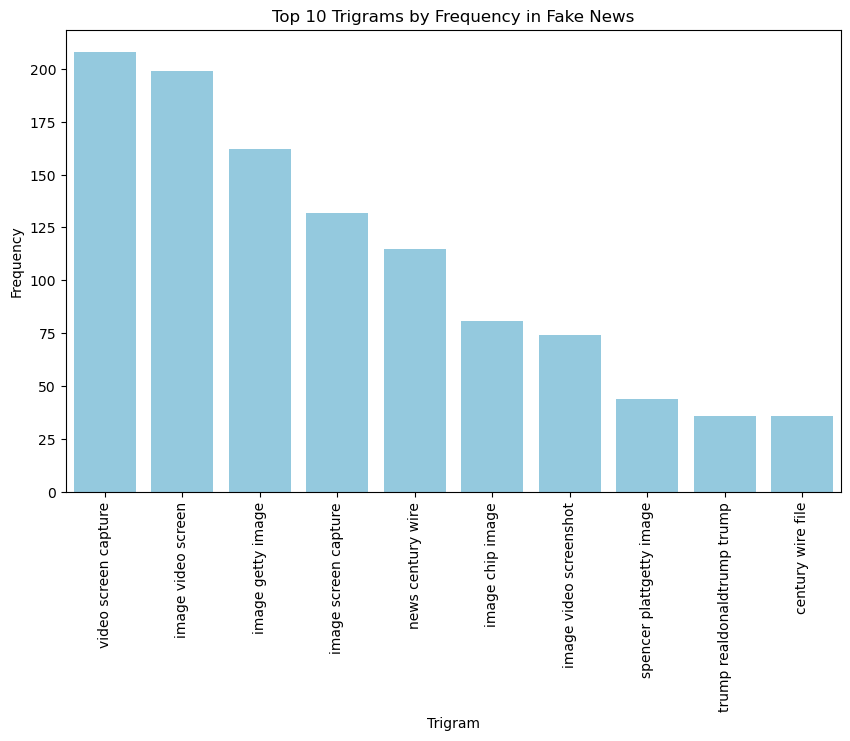

In [178]:
#Creating the Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_trigrams, color='skyblue')
plt.xlabel('Trigram')
plt.xticks(rotation=90)
plt.title('Top 10 Trigrams by Frequency in Fake News')
plt.show()

__Observations__
- Unigrams- Even in Validation data, True News uses formal terms like government, election etc. Fake News leans towards visual and sensational words like Image, Video etc.There are some common themes like Trump,State indicating the nature of political data.
- Bigrams-Even in Validation data,True News bigrams are policy/government related and formal (like trump administration,news conference). Fake News features are repeatitive or viral terms (like image image, trump supporter)
- Trigrams- Even in Validation data,True News has structured phrases(like state department official). Fake news trigrams are primarily media related (like video screen capture, image getty image), hinting visual or fabricated content.

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [182]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
word2vec_model = api.load('word2vec-google-news-300')

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [184]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def get_word2vec_vectors(text_data, model):
    vectors = []
    for text in text_data:
        # Tokenize the text and remove empty tokens
        tokens = text.split()
        # Filter out words not in the Word2Vec model
        vector = []
        for token in tokens:
            if token in model.key_to_index:
                vector.append(model[token])  # Get vector for each word
        # If there are vectors, compute the average of word vectors for the sentence
        if vector:
            sentence_vector = np.mean(vector, axis=0)  # Use mean of word vectors
            vectors.append(sentence_vector)
        else:
            vectors.append(np.zeros(model.vector_size))  # Use zero vector if no word is found in model
    return vectors

# Get the Word2Vec vectors for the training data
X_train = get_word2vec_vectors(train_df['processed_text'], word2vec_model)
X_val = get_word2vec_vectors(val_df['processed_text'], word2vec_model)

## Extract the target variable for the training data and validation data
y_train = train_df['news_label']
y_val= val_df['news_label']

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [190]:
## Initialise Logistic Regression model
lr=LogisticRegression(max_iter=1000, random_state=42)
#Define parameter grid 
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
## Train Logistic Regression model on training data
#Set up GridSearchCV
grid_search = GridSearchCV(lr, 
                           param_grid_lr, 
                           cv=5, 
                           scoring='accuracy')
grid_search.fit(X_train, y_train)
## Predict on validation data
y_pred=grid_search.predict(X_val)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [192]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy :", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall   :", round(recall,4))
print("F1 Score :", round(f1,4))


Accuracy : 0.9095
Precision: 0.9114
Recall   : 0.9223
F1 Score : 0.9168


__Observations__
- 90.95% of the total news articles are correctly classified (Accuracy).
- 91.14% of the news articles predicted as true are actually true (Precision).
- 92.23% of the actual true news articles are correctly predicted as true (Recall).
- 91.68% is the F1 Score, which is the harmonic mean of precision and recall — indicating a good balance between both.


In [194]:
# Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5386
           1       0.91      0.92      0.92      6347

    accuracy                           0.91     11733
   macro avg       0.91      0.91      0.91     11733
weighted avg       0.91      0.91      0.91     11733



__Observations__

- The model achieved an overall accuracy of 91%, correctly classifying 11,733 news articles.
- True News was classified slightly better, with 92% F1-score, compared to 90% for Class 0.
- Both macro and weighted averages are balanced at 91%, indicating consistent performance across both classes.

### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [198]:
## Initialise Decision Tree model
dt=DecisionTreeClassifier(random_state=42)
#Define parameter grid 
param_grid_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
## Train Decision Tree model on training data
#Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid_dt,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)


grid_search.fit(X_train, y_train)
# Best model
best_dt = grid_search.best_estimator_
## Predict on validation data
y_pred=grid_search.predict(X_val)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [200]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy :", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall   :", round(recall,4))
print("F1 Score :", round(f1,4))

Accuracy : 0.8183
Precision: 0.8307
Recall   : 0.8341
F1 Score : 0.8324


__Observations__

- 81.83% of the total news articles are correctly classified (Accuracy).
- 83.07% of the news articles predicted as true are actually true (Precision).
- 83.41% of the actual true news articles are correctly predicted as true (Recall).
- 83.24% is the F1 Score, which is the harmonic mean of precision and recall — indicating a good balance between both.


In [202]:
# Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      5386
           1       0.83      0.83      0.83      6347

    accuracy                           0.82     11733
   macro avg       0.82      0.82      0.82     11733
weighted avg       0.82      0.82      0.82     11733



__Observations__

- The model achieved an overall accuracy of 82%.
- True News was classified slightly better, with 83% F1-score, compared to 80% for Class 0.
- Both macro and weighted averages are balanced at 82%, indicating consistent performance across both classes.


### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [206]:
## Initialise Random Forest model
rf=RandomForestClassifier(random_state=42)
#Define param grid
param_grid_rf = {
    'n_estimators': [100, 200],          
    'max_depth': [None, 10, 20],         
    'min_samples_split': [2, 5],         
    'min_samples_leaf': [2, 5],          
}
## Train Random Forest model on training data
#Set up Grid Search
grid_search = GridSearchCV(estimator=rf,
                            param_grid=param_grid_rf,
                            cv=5,
                            scoring='accuracy',
                            n_jobs=-1)

grid_search.fit(X_train,y_train)
## Predict on validation data
y_pred=grid_search.predict(X_val)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [208]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy :", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall   :", round(recall,4))
print("F1 Score :", round(f1,4))


Accuracy : 0.878
Precision: 0.8717
Recall   : 0.908
F1 Score : 0.8895


__Observations__

- 87.8% of the total news articles are correctly classified (Accuracy).
- 87.17% of the news articles predicted as true are actually true (Precision).
- 90.8% of the actual true news articles are correctly predicted as true (Recall).
- 88.95% is the F1 Score, which is the harmonic mean of precision and recall — indicating a good balance between both.


In [210]:
# Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      5386
           1       0.87      0.91      0.89      6347

    accuracy                           0.88     11733
   macro avg       0.88      0.88      0.88     11733
weighted avg       0.88      0.88      0.88     11733



__Observations__

- The model achieved an overall accuracy of 88%.
- True News was classified slightly better, with 89% F1-score, compared to 86% for Class 0.
- Both macro and weighted averages are balanced at 88%, indicating consistent performance across both classes.


__Conclusions__
- Logistic Regression performed the best overall, with the highest F1-score (91.68%).
- Random Forest performed well too, especially in Recall (90.8%), though it lagged slightly behind Logistic Regression in Precision and F1-score.
- Decision Tree was relatively weaker in performancebut was still able to provide reasonable classifications.

## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

__Key Observations:__
- True news articles tend to use formal, institutional language, while fake news often relies on emotionally charged, dramatic, or sensational wording.
- N-gram analysis highlights that true news focuses on structured governance and policy related words, whereas fake news frequently includes visual and viral terms like "image" and "video."

__Best Model:__
- Logistic Regression delivered the strongest performance, with high evaluation metrics making it useful for identification of true news articles.
- It not only has balanced evaluation metrics but also is interpretable, allowing insights into which features influence predictions - a valuable trait in domains requiring transparency.
  
__Impact:__
- The semantic classification approach, using Word2Vec embeddings and robust preprocessing, effectively captures linguistic patterns to distinguish fake from true news.
- The solution is scalable and adaptable to other misinformation domains and suitable for integration into real-time platforms - helping to enhance public trust and reduce misinformation.
